In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Female=0, Male=1


In [5]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [17]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

C:\Users\ummea\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


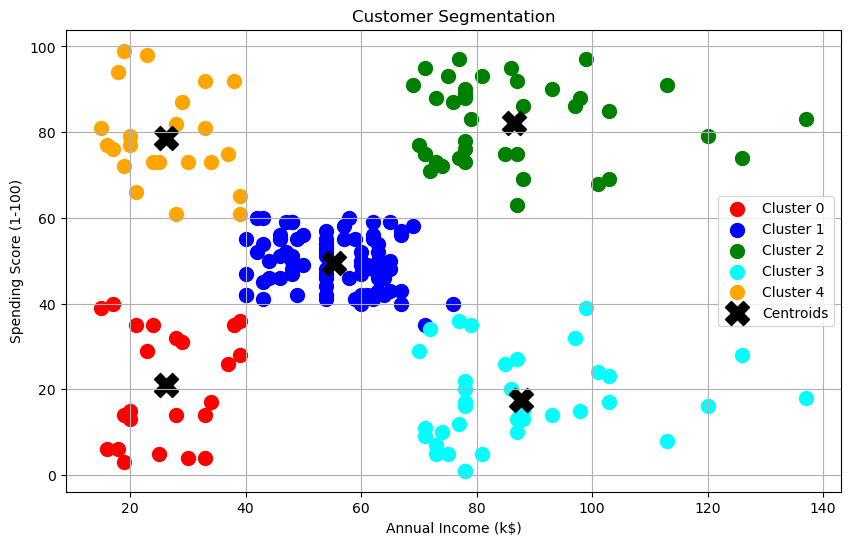

In [8]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'orange']
for i in range(5):
    cluster = df[df['Cluster'] == i]
    plt.scatter(cluster['Annual Income (k$)'], cluster['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
            s=300, c='black', marker='X', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


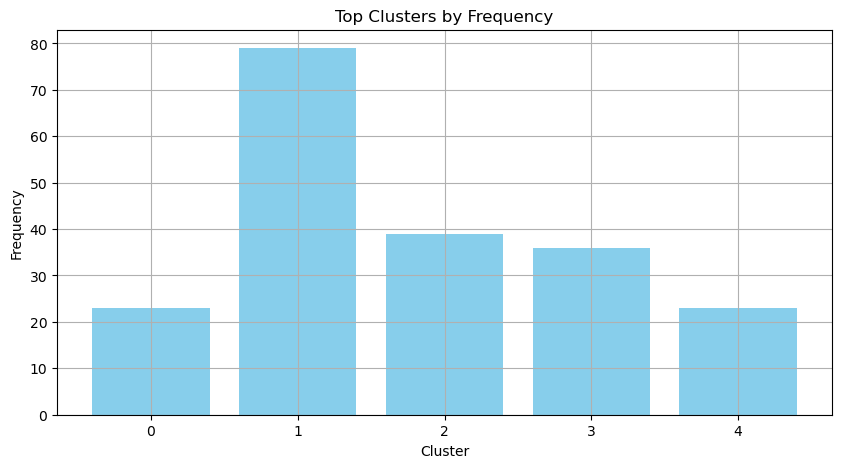

In [9]:
# --- Visualization 5: Top Clusters by Frequency ---
# Count frequency of each cluster
cluster_counts = Counter(df['Cluster'])

# Convert to DataFrame for easy plotting
cluster_freq = pd.DataFrame(cluster_counts.items(), columns=['Cluster', 'Frequency'])

# Plot the top clusters by frequency as a bar chart
plt.figure(figsize=(10, 5))
plt.bar(cluster_freq['Cluster'], cluster_freq['Frequency'], color='skyblue')
plt.title('Top Clusters by Frequency')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(cluster_freq['Cluster'])
plt.grid(True)
plt.show()


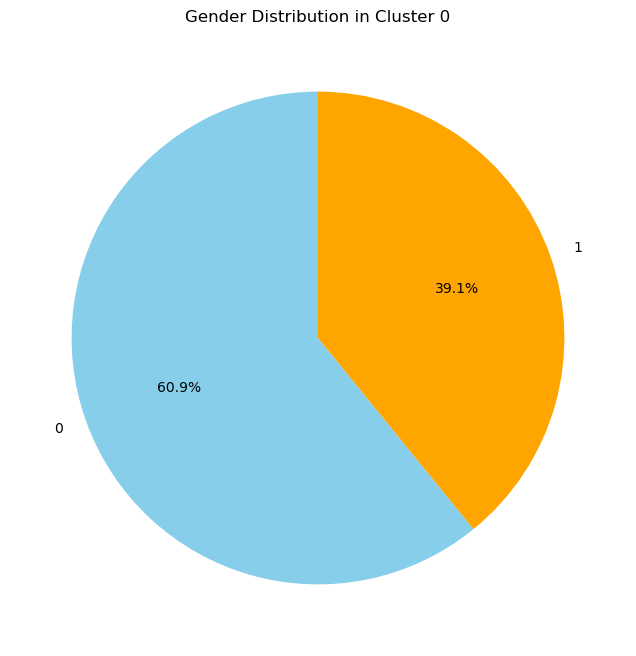

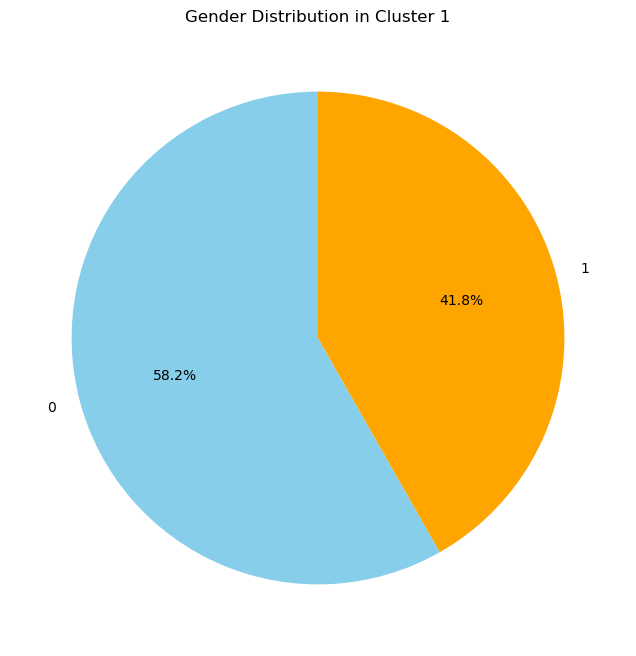

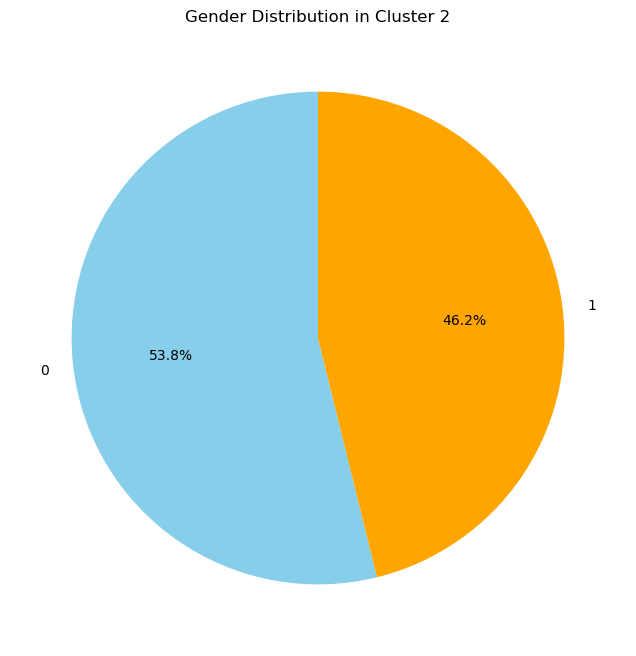

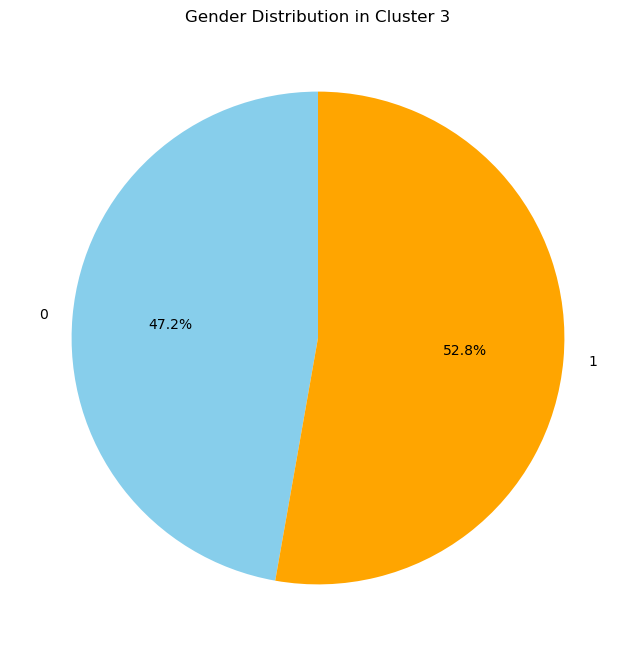

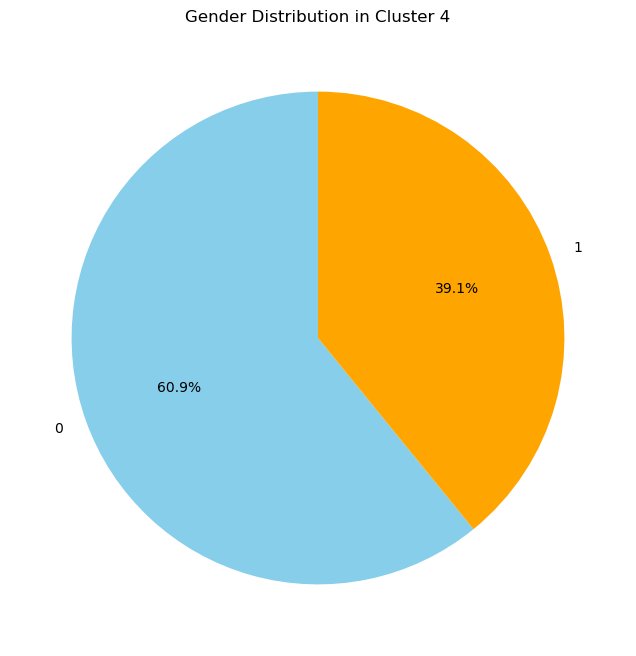

In [10]:
# --- Visualization 7: Cluster Distribution by Gender ---
gender_cluster_distribution = df.groupby(['Cluster', 'Gender']).size().unstack().fillna(0)

# Plotting the pie chart for each cluster
for cluster in range(5):
    plt.figure(figsize=(8, 8))
    gender_cluster_distribution.loc[cluster].plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                                                  colors=['skyblue', 'orange'], legend=False)
    plt.title(f'Gender Distribution in Cluster {cluster}')
    plt.ylabel('')  # Hide the ylabel
    plt.show()



In [11]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
sil_score = silhouette_score(X, df['Cluster'])
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.44


C:\Users\ummea\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ummea\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ummea\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ummea\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_

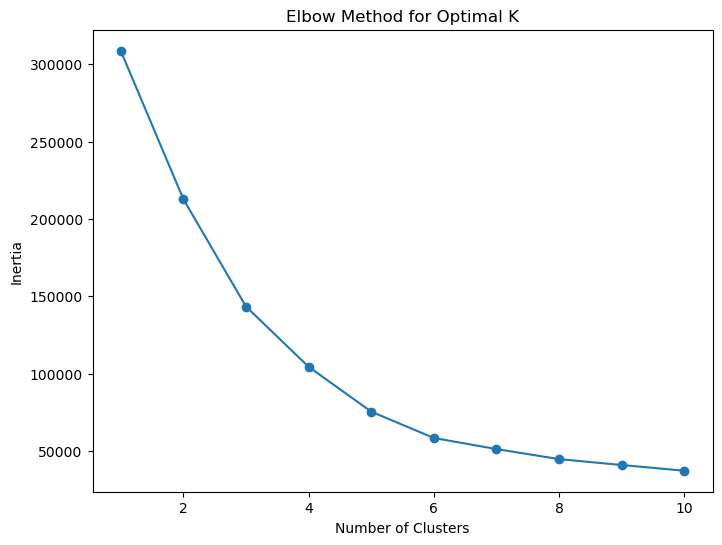

In [18]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [19]:
from sklearn.metrics import davies_bouldin_score

# Calculate the Davies-Bouldin Index
db_score = davies_bouldin_score(X, df['Cluster'])
print(f"Davies-Bouldin Index: {db_score:.2f}")


Davies-Bouldin Index: 0.82


In [20]:
# Profiling clusters by mean values of features
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)


         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         23.000000  0.391304  45.217391           26.304348   
1         86.265823  0.417722  43.088608           55.291139   
2        162.000000  0.461538  32.692308           86.538462   
3        163.500000  0.527778  40.666667           87.750000   
4         24.000000  0.391304  25.521739           26.304348   

         Spending Score (1-100)  
Cluster                          
0                     20.913043  
1                     49.569620  
2                     82.128205  
3                     17.583333  
4                     78.565217  


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


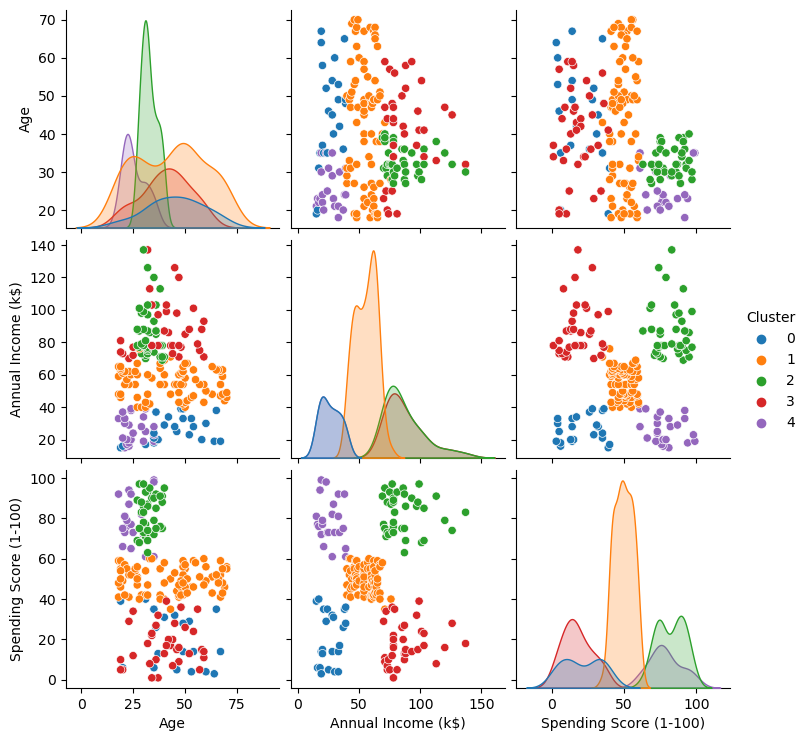

In [16]:


sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='tab10')
plt.show()


In [21]:
print("Clustering Performance Evaluation:")
print(f"Silhouette Score: {sil_score:.2f}")
print(f"Davies-Bouldin Index: {db_score:.2f}")


Clustering Performance Evaluation:
Silhouette Score: 0.44
Davies-Bouldin Index: 0.82
